In [1]:
#Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py 
import cufflinks as cf
import plotly
import plotly.express as px
import plotly.io as pio
%matplotlib inline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()

In [2]:
#Getting the data
df=pd.read_csv(r"C:\Users\Lakshi\Downloads\Crime_Data_from_2010_to_2019.csv")
df2=pd.read_csv(r"C:\Users\Lakshi\Downloads\Crime_Data_from_2020_to_Present.csv")
#Since area has different data type -- so changing the columns of df2
#To check columns for df
df.columns
#To use same columns for df2
df2.columns=['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON']
#Concatenating the dataframes
k=pd.concat([df,df2],ignore_index=True)
#Creating a non-editable copy of concatenated dataset
k1=k.copy()
k1.columns
#Selected relevant varaibles
k2=k1[['DR_NO', 'DATE OCC', 'TIME OCC', 'AREA ','AREA NAME',
       'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc','Crm Cd 1', 'Mocodes',
       'Vict Age', 'Vict Sex','Vict Descent', 'Premis Desc',
       'Weapon Used Cd','Weapon Desc', 'Status','Status Desc', 'LOCATION']]
#Looking at missing values
k.isnull().sum()
#DATE AND TIME COLUMN FORMATTING
k2['DATE OCC']=k2['DATE OCC'].astype(str).str.replace('-','/')
#Changing the data type of date
k2['DATE OCC']=pd.to_datetime(k2['DATE OCC'])
#Formatting TIME
k2['TIME OCC']=k2['TIME OCC']/100
k2['DATE OCC']
#Put date time together 
k2['DATE OCC']=k2['DATE OCC'].astype(str)+' '+k2['TIME OCC'].astype(str)
k2['DATE OCC']=pd.to_datetime(k2['DATE OCC'],format='%Y-%m-%d %H.%M')
k2['DATE OCC']
#Now we have time along the date here
#To get separate columns for hour,month,year,day
k2.index=pd.DatetimeIndex(k2['DATE OCC'])
k2['HOUR']=k2['DATE OCC'].apply(lambda x:x.hour)
k2['MONTH']=k2['DATE OCC'].apply(lambda x:x.month)
k2['YEAR']=k2['DATE OCC'].apply(lambda x:x.year)
k2['DAY']=k2['DATE OCC'].apply(lambda x:x.day)
#getting a date column
k2['DATE'] = pd.to_datetime({'year':k2['YEAR'], 'month':k2['MONTH'], 'day':k2['DAY']})
#Got the weekday as well
k2['DAY_OF_WEEK'] = k2['DATE'].dt.day_name()
#Subsetting the dataset for females
kf=k2[k2["Vict Sex"]=="F"]


In [5]:
#how number of crimes vary in each month across years

kf.resample('M').size().iplot(title='Number of crime per month from 2010-21',
    xTitle='Years',
    yTitle='Number of crimes')

<ipython-input-7-b4a266c03cf0>:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

C:\Users\Lakshi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Distribution of Crimes per day'}, ylabel='Density'>

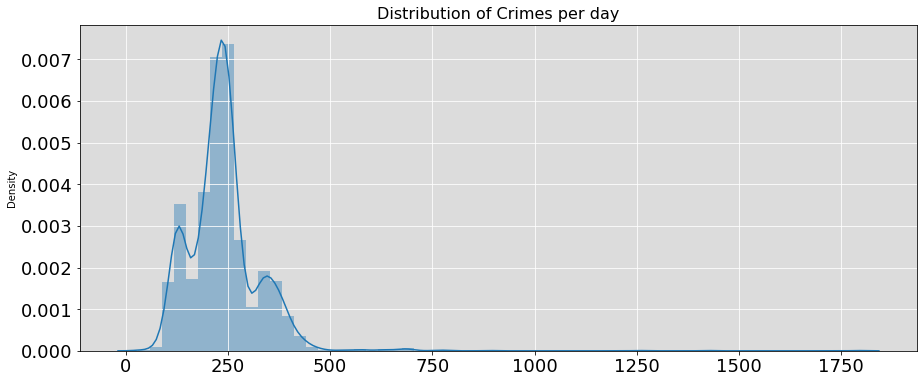

In [7]:
#Distribution of crimes
#Using resample('D') to group it by day and size() to return the count
plt.figure(figsize=(15,6))
plt.title('Distribution of Crimes per day', fontsize=16)
plt.tick_params(labelsize=18)
plt.grid(color = "white")
ax = plt.axes()
ax.set_facecolor('gainsboro')
sns.distplot(kf.resample('D').size(), bins=60)

In [8]:
#There is an outlier >1750--Lets find out which day it is
# Using idxmax() to find out the index of the max value
kf.resample('D').size().idxmax()
#So the day was 2012-01-01(1st january 2012)

Timestamp('2012-01-01 00:00:00', freq='D')

<ipython-input-9-73cfde62a47f>:20: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



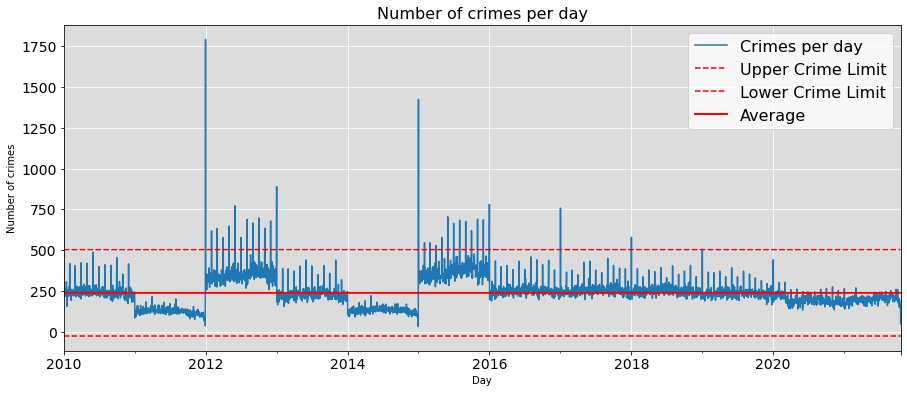

In [9]:
# Create a Upper Control Limit (UCrL) and a Lower Control Limit (LCrL) without the outlier
crimes_daily = pd.DataFrame(kf[kf['DATE OCC'] != '2012-01-01'].resample('D').size())
#To cal mean
crimes_daily['MEAN'] = kf[kf['DATE OCC'] != '2012-01-01'].resample('D').size().mean()
#To cal standard deviation
crimes_daily['STD'] = kf[kf['DATE OCC'] != '2012-01-01'].resample('D').size().std()
UCrL = crimes_daily['MEAN'] + 3 * crimes_daily['STD']
LCrL = crimes_daily['MEAN'] - 3 * crimes_daily['STD']

# Plot Total crimes per day, UCL, LCL, Moving-average
plt.figure(figsize=(15,6))
kf.resample('D').size().plot(label='Crimes per day')
UCrL.plot(color='red', ls='--', linewidth=1.5, label='Upper Crime Limit')
LCrL.plot(color='red', ls='--', linewidth=1.5, label='Lower Crime Limit')
crimes_daily['MEAN'].plot(color='red', linewidth=2, label='Average')
plt.title('Number of crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.grid(color = "white")
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})
plt.savefig('Time series graph')
plt.show()

<AxesSubplot:title={'center':'Average Number of Crime per Day and Month'}, ylabel='DAY'>

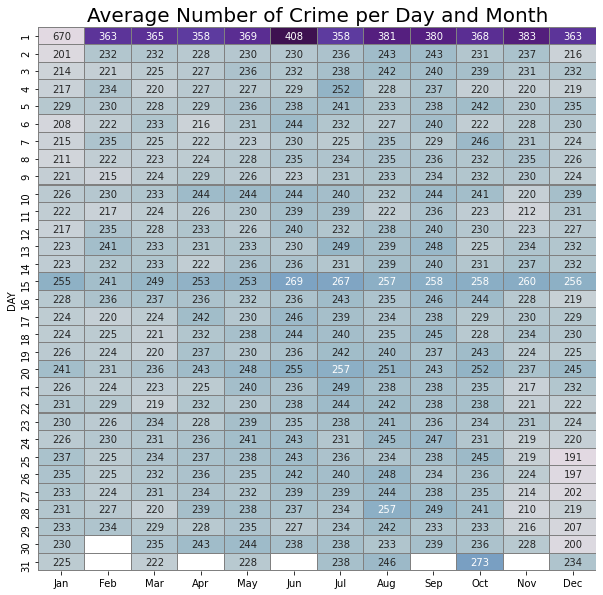

In [10]:
# Create a pivot table with day and month; another that counts the number of years that each day had; and the average. 
crimes_pivottable = kf[(kf['DATE'] != '2012-01-01')].pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=len)
crimes_pivottable_yearcount = kf[(kf['DATE'] != '2012-01-01')].pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
crimes_avg = crimes_pivottable/crimes_pivottable_yearcount
crimes_avg.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Using seaborn heatmap
plt.figure(figsize=(10,10))
plt.title('Average Number of Crime per Day and Month', fontsize=20)
sns.heatmap(crimes_avg.round(), cmap='twilight', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f")

In [11]:
#To visualise crime categories
g= kf['Crm Cd Desc'].value_counts()
f= pd.DataFrame(g)
f
f.iplot(kind = 'bar',title='Categories of crime',
    yTitle='Count of crime', dimensions =(1000,700))

In [12]:
#For top 10 crimes per month
m=kf['Crm Cd Desc'].value_counts()[:10]
cr10=list(m.index)
kh3=kf[kf['Crm Cd Desc'].isin(cr10)]
crbymonth=kh3.groupby('MONTH').size().reset_index(name='No of crime')
crbymonth.iplot(title='Monthly Crime frequency',
    xTitle='MONTH',
    yTitle='Number of crimes',x = 'MONTH',y = 'No of crime')

In [13]:
#For top 10 crimes
crbyhour=kh3.groupby('HOUR').size().reset_index(name='No of crime')
crbyhour['HOUR']=crbyhour['HOUR'].apply(lambda x:str(x)+":00")
crbyhour.iplot(title='Hourly Crime Frequency',
    xTitle='Time',
    yTitle='Number of crimes',x = 'HOUR',y = 'No of crime')

In [14]:
#To look at crimes by type 
k4=kf[kf['Crm Cd Desc'].isin(cr10)]
crbytype=k4.groupby(['HOUR','Crm Cd Desc']).size().reset_index(name='No of crime')

#To look at types of crime
barchart = px.bar(data_frame=crbytype,x = 'HOUR',y='No of crime',title='Hourly Crime Frequency by Crime type',color = 'Crm Cd Desc',opacity = 0.9,orientation= 'v',barmode = 'relative',width = 1000
    )
barchart

<AxesSubplot:title={'center':'Major crimes'}, xlabel='DAY_OF_WEEK', ylabel='Crm Cd Desc'>

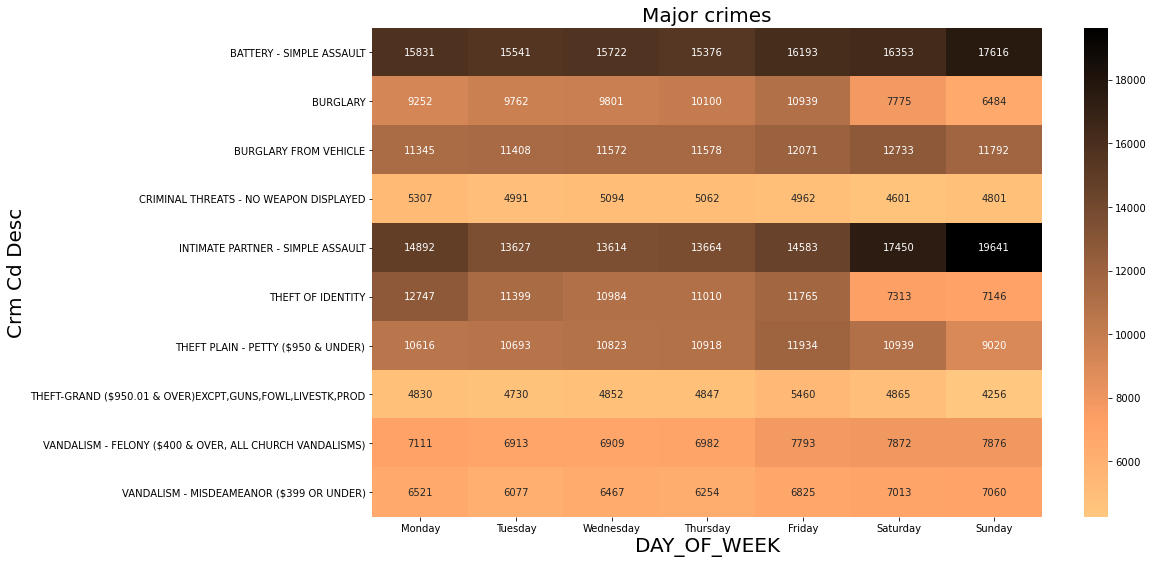

In [15]:
#For number of crimes on each day
kdc10=kf.groupby(['Crm Cd Desc','DAY_OF_WEEK'])['DR_NO'].count()
#Heatmap showing top 10 crimes each day
fig=plt.figure(figsize=(15,9))
axl=fig.add_subplot(111)
axl.set_title('Major crimes',fontsize=20)
axl.set_xlabel('details',fontsize=20)
axl.set_ylabel('DAY',fontsize=20)
kd60=pd.DataFrame(kdc10).reset_index()
kd70=kd60[kd60['Crm Cd Desc'].isin(cr10)]

kd80=kd70.pivot_table('DR_NO',aggfunc=np.sum,columns='DAY_OF_WEEK',index='Crm Cd Desc')
#For correctig the order of the weekday
a=list(kd80.columns)
a[0],a[1],a[2],a[3],a[4],a[5],a[6]=a[1],a[5],a[6],a[4],a[0],a[2],a[3]
kd90=kd80[a]


sns.heatmap(kd90,cmap="copper_r",annot=True,fmt='g')

In [16]:
#List of henious/serious crimes
cr11=["BATTERY - SIMPLE ASSAULT","INTIMATE PARTNER - SIMPLE ASSAULT","INTIMATE PARTNER - AGGRAVATED ASSAULT","RAPE, FORCIBLE","BATTERY WITH SEXUAL CONTACT","CHILD ABUSE (PHYSICAL) - SIMPLE ASSAUL","SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ","INDECENT EXPOSURE","SEXUAL PENETRATION W/FOREIGN OBJECT","STALKING","ORAL COPULATION","LEWD CONDUCT"]
len(cr11)
cr11

['BATTERY - SIMPLE ASSAULT',
 'INTIMATE PARTNER - SIMPLE ASSAULT',
 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
 'RAPE, FORCIBLE',
 'BATTERY WITH SEXUAL CONTACT',
 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAUL',
 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
 'INDECENT EXPOSURE',
 'SEXUAL PENETRATION W/FOREIGN OBJECT',
 'STALKING',
 'ORAL COPULATION',
 'LEWD CONDUCT']

<AxesSubplot:title={'center':'Heinous Crimes'}, xlabel='DAY_OF_WEEK', ylabel='Crm Cd Desc'>

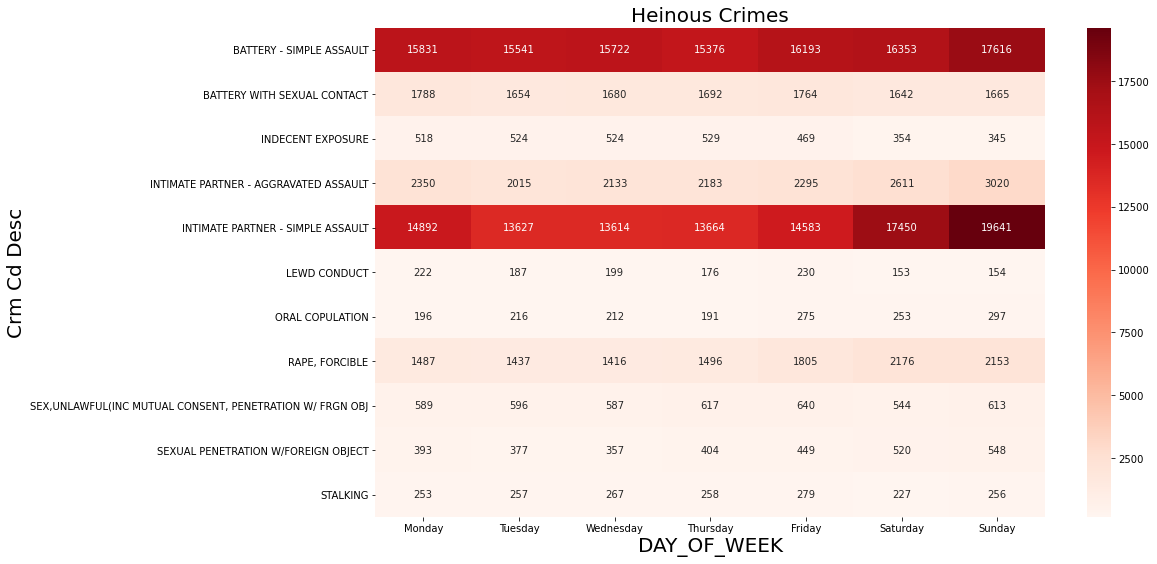

In [17]:
#For henious crimes heat map for day of the week
kdc11=kf.groupby(['Crm Cd Desc','DAY_OF_WEEK'])['DR_NO'].count()
fig=plt.figure(figsize=(15,9))
axl=fig.add_subplot(111)
axl.set_title('Heinous Crimes',fontsize=20)
axl.set_xlabel('details',fontsize=20)
axl.set_ylabel('DAY',fontsize=20)
kd61=pd.DataFrame(kdc11).reset_index()
kd71=kd61[kd61['Crm Cd Desc'].isin(cr11)]

kd81=kd71.pivot_table('DR_NO',aggfunc=np.sum,columns='DAY_OF_WEEK',index='Crm Cd Desc')
#For correctig the order of the weekday
a=list(kd81.columns)
a[0],a[1],a[2],a[3],a[4],a[5],a[6]=a[1],a[5],a[6],a[4],a[0],a[2],a[3]
kd82=kd81[a]

sns.heatmap(kd82,cmap="Reds",annot=True,fmt='g')

In [19]:
#For henious crimes arrest rate
d={'Invest Cont':'N',
 'Adult Other':'N',
 'Adult Arrest':'Y',
 'Juv Arrest':'Y',
 'Juv Other':'N',
 'UNK':'N'}
kf['Status Desc2']=kf['Status Desc'].map(lambda x: d[x])
#graph showing if the accused was arrested or not in top 10 crimes
crbyarrest=kf.groupby(['Crm Cd Desc','Status Desc2']).size().reset_index(name='No of crime')
crbyarrest1=crbyarrest[crbyarrest['Crm Cd Desc'].isin(cr11)]
ccrbyarrest2=crbyarrest1.pivot_table('No of crime',aggfunc=np.sum,columns='Status Desc2',index='Crm Cd Desc',fill_value=0).reset_index()
ccrbyarrest2['Total']=ccrbyarrest2['N']+ccrbyarrest2['Y']
ccrbyarrest2['Arrest']=ccrbyarrest2['Y']/ccrbyarrest2['Total']
ccrbyarrest2['Non-Arrest']=ccrbyarrest2['N']/ccrbyarrest2['Total']
ccrbyarrest2=ccrbyarrest2[['Crm Cd Desc','Arrest','Non-Arrest']]
ccrbyarrest3=ccrbyarrest2.set_index('Crm Cd Desc')
ccrbyarrest3.iplot(kind = 'bar',barmode = 'stack',title='Arrest rate for Heinous crimes',
    xTitle='Type of Crime',
    yTitle='Arrest rate')

In [20]:
h = kf['AREA NAME'].value_counts()
kf_a = pd.DataFrame(h)
#kf_a
#Safest city 
kf_a.iplot(kind = 'bar',mode = 'stack',title='Crimes by street',
    xTitle='Street',
    yTitle='count')

In [21]:
e=kf["Crm Cd Desc"].value_counts()
o = pd.DataFrame(e)
o.reset_index(inplace= True)
o.columns=['Crime Type','Count']
o

,Crime Type,Count
0,BATTERY - SIMPLE ASSAULT,112632
1,INTIMATE PARTNER - SIMPLE ASSAULT,107471
2,BURGLARY FROM VEHICLE,82499
3,THEFT PLAIN - PETTY ($950 & UNDER),74943
4,THEFT OF IDENTITY,72364
...,...,...
135,FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS ...,1
136,FAILURE TO DISPERSE,1
137,BLOCKING DOOR INDUCTION CENTER,1
138,TRAIN WRECKING,1


In [29]:
import openpyxl
w= pd.ExcelWriter(r"C:\Users\Lakshi\Desktop\test.xlsx",mode='a',engine='openpyxl')
o.to_excel(w,sheet_name='a')
w.save()
w.close()

<ipython-input-22-fa4aedec8c98>:10: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



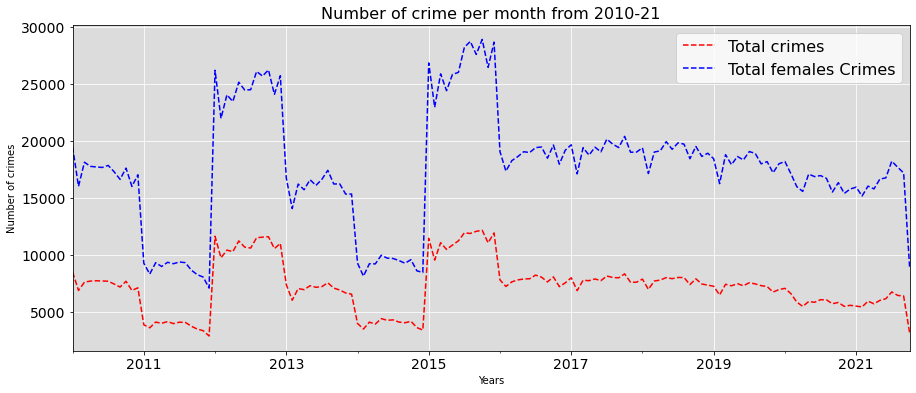

In [22]:
#Based on QnA recommendations
plt.figure(figsize=(15,6))
kf.resample('M').size().plot(color='red',ls='--', linewidth=1.5,label='Total crimes')
k2.resample('M').size().plot(color='blue',ls='--', linewidth=1.5,label='Total females Crimes')
#kf.resample('D').size().plot(label='Crimes per day')
plt.title('Number of crime per month from 2010-21', fontsize=16)
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.grid(color = "white")
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})
#plt.savefig('Total Time series graph')
plt.show()

Text(0, 0.5, 'No of crimes')

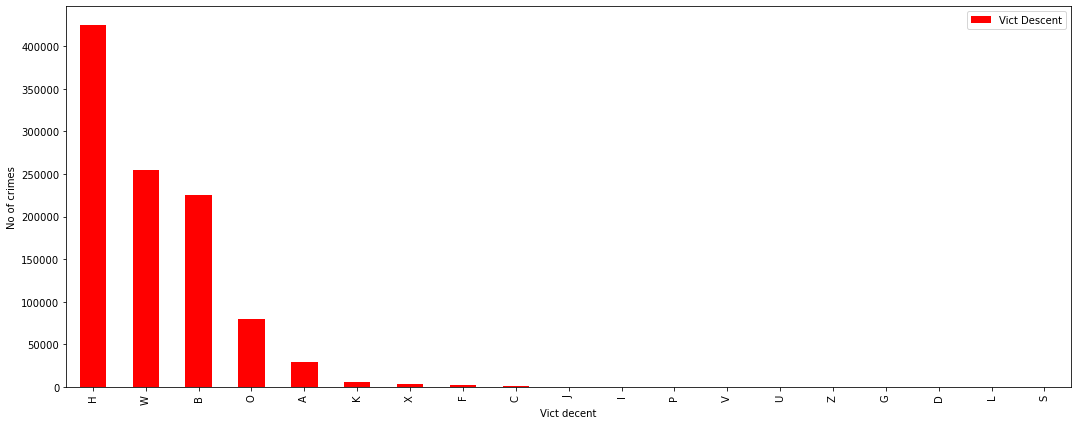

In [23]:
#Based on QnA recommendations
a=kf['Vict Descent'].value_counts().plot(kind='bar',legend=True,figsize=(18,7),color='red')
a.set_xlabel('Vict decent')
a.set_ylabel('No of crimes')